In [7]:
# Import modules
import os
from glob import glob
import tiktoken
enc = tiktoken.get_encoding("cl100k_base")

In [8]:
# Navigate to the directory
root  = os.path.join(os.getcwd(), 'Rearranged Order/')

In [9]:
# Sort the file names 
paths = sorted(glob(root+'*.txt'))

In [10]:
all_paths = [path.split('\\')[-1] for path in paths]
all_paths

['A00-Abbreviations.txt',
 'A01-Description.txt',
 'A02-Catholic Identity, Vision Mission and Core Values.txt',
 'A03-The University Seal.txt',
 'A04-History.txt',
 'A05-University Saints.txt',
 'A06-USC Organizational Structure.txt',
 'A07-Admission.txt',
 'A08-Admission Steps for Freshmen.txt',
 'A09-Admission Steps for International Students.txt',
 'A10-Admission Steps for Transferee.txt',
 'A11-Admission Steps for Graduate Students.txt',
 'A12-Admission Steps for Juris Doctor.txt',
 'A13-College Entrance Examination.txt',
 'A14-Post-Admission Enrollment Requirements.txt',
 'A15-Post-Admission Enrollment Steps.txt',
 'A16-Enrollment Mechanics.txt',
 'A17-Enrollment Timeline.txt',
 'A18-Enrollment Steps for Continuing Students.txt',
 'A19-Enrollment Concerns.txt',
 'A20-Course Accreditation.txt',
 'A21-Course Override.txt',
 'A22-Course Equivalency (In-Lieu).txt',
 'A23-Overload.txt',
 'A24-Simultaneous Enrollment.txt',
 'A25-Tutorial and Petition.txt',
 'A26-Course Withdrawal.txt',


In [11]:
# Initialize lengths
lengths = []
token_lengths = []

In [12]:
# Initialize new file:
new_file = 'USC Student Manual and Enrollment Guide.txt'
with open(new_file, 'w'):
  pass

In [13]:
# Copy each file to new file
for path in paths:
  with open(new_file, 'a') as out_, open(path, 'r') as in_:
    print(path)
    text = in_.read()
    lengths.append(len(text))
    token_lengths.append(len(enc.encode(text)))
    out_.write(text + '\n\n\n')

c:\Users\Dayata\Documents\GitHub\NLP_Student_Manual_Chatbot\4. Text Analysis\Rearranged Order\A00-Abbreviations.txt
c:\Users\Dayata\Documents\GitHub\NLP_Student_Manual_Chatbot\4. Text Analysis\Rearranged Order\A01-Description.txt
c:\Users\Dayata\Documents\GitHub\NLP_Student_Manual_Chatbot\4. Text Analysis\Rearranged Order\A02-Catholic Identity, Vision Mission and Core Values.txt
c:\Users\Dayata\Documents\GitHub\NLP_Student_Manual_Chatbot\4. Text Analysis\Rearranged Order\A03-The University Seal.txt
c:\Users\Dayata\Documents\GitHub\NLP_Student_Manual_Chatbot\4. Text Analysis\Rearranged Order\A04-History.txt
c:\Users\Dayata\Documents\GitHub\NLP_Student_Manual_Chatbot\4. Text Analysis\Rearranged Order\A05-University Saints.txt
c:\Users\Dayata\Documents\GitHub\NLP_Student_Manual_Chatbot\4. Text Analysis\Rearranged Order\A06-USC Organizational Structure.txt
c:\Users\Dayata\Documents\GitHub\NLP_Student_Manual_Chatbot\4. Text Analysis\Rearranged Order\A07-Admission.txt
c:\Users\Dayata\Documen

In [14]:
import pandas as pd

len_dict = {'articles': all_paths, 'char lengths':lengths, 'token lengths':token_lengths}
df = pd.DataFrame(len_dict)

In [15]:
df

,articles,char lengths,token lengths
0,A00-Abbreviations.txt,3655,707
1,A01-Description.txt,3508,723
2,"A02-Catholic Identity, Vision Mission and Core...",4137,814
3,A03-The University Seal.txt,854,200
4,A04-History.txt,7722,1682
...,...,...,...
103,B38-BS Pharmacy.txt,3219,559
104,B39-BS Psychology.txt,2184,398
105,B40-BS Tourism Management.txt,3364,598
106,B41-B Secondary Education Major in Science.txt,2599,472


In [16]:
df.nlargest(10, 'token lengths')

,articles,char lengths,token lengths
51,A51-List of Offenses.txt,12378,2774
61,A61-Directory of Student Support Services and ...,11062,2310
46,A46-Code of Conduct for Students.txt,12157,2268
60,A60-Directory of Student Support Services and ...,10560,2177
14,A14-Post-Admission Enrollment Requirements.txt,10808,2172
35,A35-Curricular and Non-Curricular Requirements...,10184,2050
62,A62-Directory of Academic Programs and Departm...,7608,1785
37,A37-Academic Performance and Grading System.txt,7701,1779
4,A04-History.txt,7722,1682
63,A63-Directory of Academic Programs and Departm...,5818,1428


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


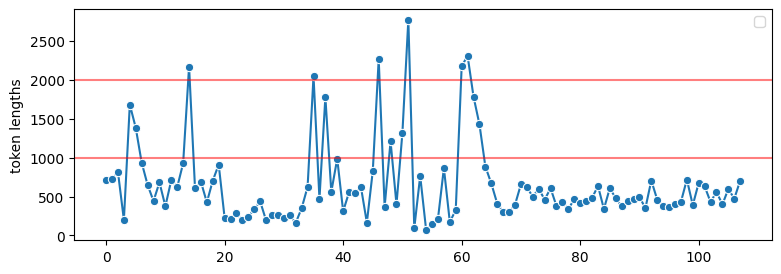

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[9,3])
sns.lineplot(data=df['token lengths'], dashes=False, marker='o')
plt.axhline(y=1000, color='r', linestyle='-', alpha=0.5)
plt.axhline(y=2000, color='r', linestyle='-', alpha=0.5)
plt.legend()
plt.show()

In [13]:
# Number of articles with <=1000 tokens
print(f'Number of articles with <=1000 tokens: {len([i for i in token_lengths if i<=1000])}')

Number of articles with <=1000 tokens: 95


In [14]:
# Number of articles with 1000-2000 tokens
print(f'Number of articles with 1001-2000 tokens: {len([i for i in token_lengths if i>1000 and i<=2000])}')

Number of articles with 1001-2000 tokens: 7


In [15]:
# Number of articles with more than 2000 tokens
print(f'Number of articles with >2000 tokens: {len([i for i in token_lengths if i>2000])}')

Number of articles with >2000 tokens: 6


In [16]:
# Get total character length
print(f'Total character length: {sum(lengths)}')
# Get total token lengths
print(f'Total token length: {sum(token_lengths)}')

Total character length: 354600
Total token length: 70009


In [17]:
df.to_csv('topic_lengths.csv')
print('Saved to CSV!')

Saved to CSV!


In [18]:
# Group stats by source
sources = ['Student Manual','Enrollment Guide','Directories','ISMIS','FAQ Posts','UG Programs']
indices = [
  [0,1,2,3,4,5,6,7,16,17,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59],
  [8,9,10,11,12,13,14,15,18,20,21,22,23,24,25,26,27,28,29,30,31,32],
  [60,61,62,63],
  [64,65],
  [19,33],
  list(range(66,108))
]

text_lengths_sources = []
token_lengths_sources = []
article_counts = []

for i in range(len(indices)):
  temp1 = [lengths[x] for x in indices[i]]
  text_lengths_sources.append(sum(temp1))
  temp2 = [token_lengths[x] for x in indices[i]]
  token_lengths_sources.append(sum(temp2))
  article_counts.append(len(indices[i]))

df_sources_dict = {
  'Source' : sources,
  'Article count': article_counts,
  'Total characters': text_lengths_sources,
  'Total tokens': token_lengths_sources
}

df_sources = pd.DataFrame(df_sources_dict)
df_sources.head(6)


,Source,Article count,Total characters,Total tokens
0,Student Manual,36,141323,28690
1,Enrollment Guide,22,51493,10521
2,Directories,4,35048,7700
3,ISMIS,2,7927,1553
4,FAQ Posts,2,6152,1261
5,UG Programs,42,112657,20284


<Axes: xlabel='Total tokens', ylabel='Source'>

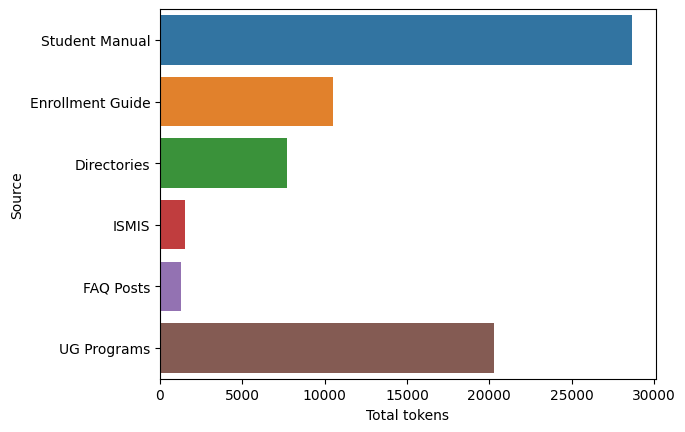

In [19]:
import seaborn as sns

df_sources.sort_values(by=['Total tokens'])
sns.barplot(df_sources, y='Source', x='Total tokens')

<Axes: xlabel='Article count', ylabel='Source'>

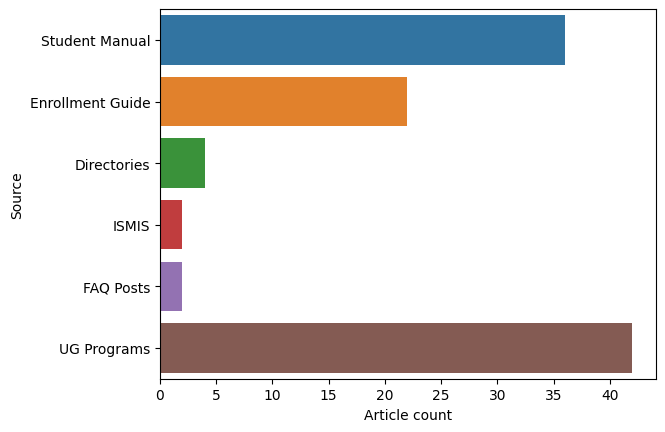

In [20]:
sns.barplot(df_sources, y='Source', x='Article count')

In [22]:
df_sources.to_csv('topic_lengths_sources.csv')
print('Saved to CSV!')

Saved to CSV!
